In [57]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [58]:
train_dir='/content/drive/MyDrive/Homework 2-20250321T023248Z-001/Homework 2/Whorls'
img_width, img_height=128,128
batch_size=32
train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [59]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_width, img_height,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(5,activation='softmax')
])

Found 368 images belonging to 5 classes.


In [60]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
history=model.fit(train_generator,epochs=20)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9338 - loss: 0.1791
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9162 - loss: 0.2169
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9275 - loss: 0.2346
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8900 - loss: 0.2690
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9258 - loss: 0.2433
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9316 - loss: 0.2103
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9619 - loss: 0.1263
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9342 - loss: 0.1351
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9210 - loss: 0.1737
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9334 - loss: 0.1934
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9627 - loss: 0.1300
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9020 - lo

In [74]:
model.save('fingerprints_cnn.keras')

In [5]:
from tensorflow import keras

# Load the saved model
model = keras.models.load_model('fingerprints_cnn.keras')

# Check the model summary to verify it loaded correctly
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,915,857 (37.83 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,610,572 (25.22 MB)

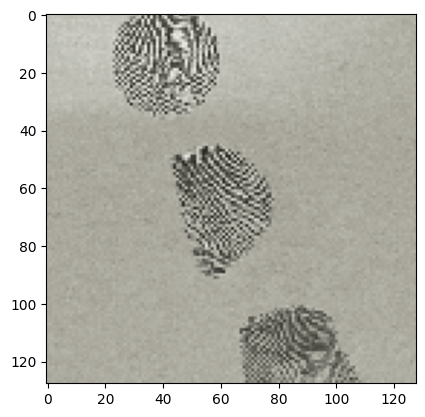

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Ngón tay: Ngón giữa


In [78]:
from matplotlib import pyplot as plt
from keras.utils import load_img
import numpy as np
path = '/content/tinywow_IMG_3405_77395046.png'
# Tiên đoán loại s
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img = np.array(img)
img = img / 255.0
img = img.reshape(1, 128, 128, 3)
prediction=np.argmax(model.predict(img))
#Ánh xạ loại tới tên người
class_labels = {v: k for k, v in train_generator.class_indices.items()}
Finger = class_labels[prediction]
print(f'Ngón tay: {Finger}')